Any counter-examples for the collatz conjecture using the extended calculus of indications, would lead to the autonomous state. This regarding the closed cycles, as the trajectories which lead to infinities wouldn't be able to be found in this manner. As such, any trajectory which is a counter-example (only referring to closed cycles) would have the property $T(n^{\nabla}) = n^{\nabla}$, such that $n$ re-entries its own indicational space, or $n^{\nabla} = \lim\limits_{x \rightarrow \infty} T^{x}$. The problem resides in reducing the exhaustive search, such that there's reduction of the expressions (using only the marked and unmarked states) from an initial $n$ based on the algebra developed. Any priorly referred counter-example would have a specific period $p$ such that $T^{x + p} = T^{x}$. The waveform developed for each trajectory is based on applying the marked state when $n$ even, and unmarked state (or double marking) when $n$ odd.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def collatz(n):
    steps = 0
    while n != 1:
        steps += 1
        if n % 2 == 0:
            n /= 2
        else:
            n = 3*n + 1
    return steps

Text(0, 0.5, 'num steps')

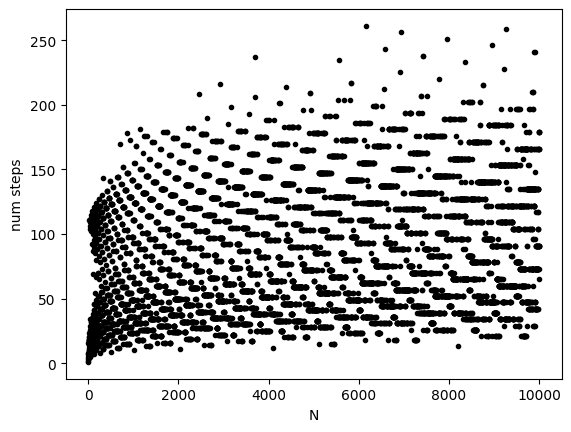

In [3]:
nums = np.arange(2, 10000)
steps = [collatz(num) for num in nums]

plt.plot(nums, steps, "k.")
plt.xlabel("N")
plt.ylabel("num steps")

In [37]:
def collatz_indicational(n):
    waveform = [0] #waveform progression
    if n == 0:
        steps = 0 
    else:
        while n != 1:
            if n % 2 == 0:
                waveform.append(abs(waveform[-1] - 1))
                n /= 2
            else:
                waveform.append(waveform[-1])
                n = 3*n + 1
        steps = len(waveform) - 1
    return waveform, steps

In [5]:
wave, steps = collatz_indicational(10)

In [6]:
def entropy(wave):
    counts = np.unique(np.array(wave), return_counts=True)[1]
    p = counts/len(wave)
    return -np.sum(p * np.log(p))

Text(0, 0.5, 'Waveform entropy')

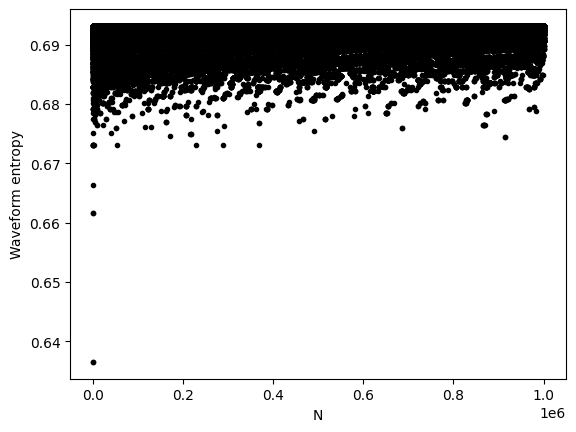

In [7]:
max = 1e6
waves = [collatz_indicational(n)[0] for n in np.arange(2, max)]
probs = [entropy(wave) for wave in waves]
plt.plot(np.arange(2, max), probs, "k.")
plt.xlabel("N")
plt.ylabel("Waveform entropy")

Text(0, 0.5, 'Frequency')

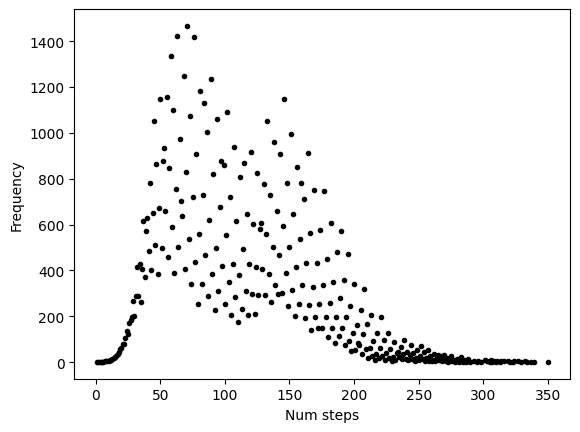

In [8]:
max = 1e5
nums = np.arange(2, max)
steps = [collatz(num) for num in nums]
counts, freqs = np.unique(steps, return_counts=True)
plt.plot(counts, freqs, "k.")
plt.xlabel("Num steps")
plt.ylabel("Frequency")

In [9]:
max = 1e3
nums = np.arange(2, max)
col1 = [collatz(num) for num in nums] #num steps
col2 = [collatz(col) for col in col1] #num steps correspondent to col1 nums
col3 = [collatz(col) if col != 0 else 0 for col in col2]
col4 = [collatz(col) if col != 0 else 0 for col in col3]

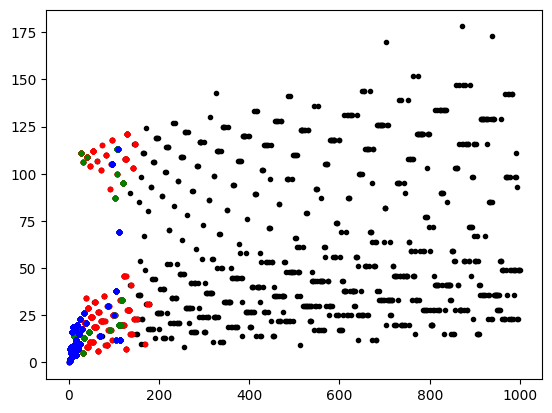

In [10]:
plt.plot(nums, col1, "k.")
plt.plot(col1, col2, "r.")
plt.plot(col2, col3, "g.")
plt.plot(col3, col4, "b.")

In [11]:
#turn this into a func?
n = 2000
first, first_steps = collatz_indicational(n)
second, second_steps = collatz_indicational(first_steps)
third, third_steps = collatz_indicational(second_steps)
H = entropy(first) * entropy(second) * entropy(third)

In [12]:
third

[0, 1, 0, 0, 1, 0, 1, 0]

In [13]:
def collatz_compose(n, T):
    """
    Initial number n -> return num steps as next n
    Repeat T cycles -> Col(Col(Col(...)))
    """
    waveform_entropy = []
    for _ in range(T):
        wave, steps = collatz_indicational(n)
        n = steps
        waveform_entropy.append(entropy(wave))
    return np.prod(np.array(waveform_entropy))

Text(0, 0.5, 'Waveform entropy')

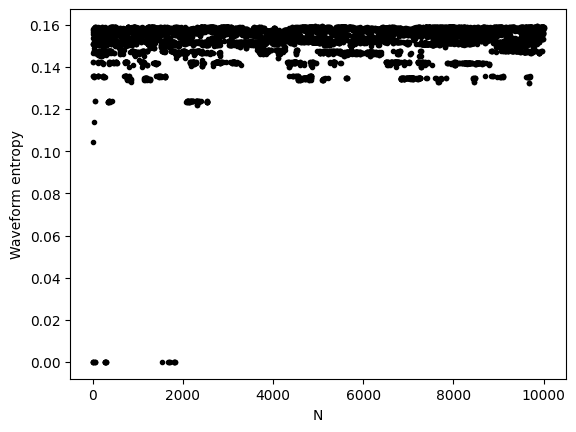

In [14]:
cycles = 5
max = 1e4
nums = np.arange(2, max)
ent = [collatz_compose(num, cycles) for num in nums]
plt.plot(nums, ent, "k.")
plt.xlabel("N")
plt.ylabel("Waveform entropy")

In [15]:
max = 1e3
nums = np.arange(2, max)
steps = [collatz(num) for num in nums]
G = (max - 2)/np.sum(steps)
G #gravitational constant (depending on environment) 
# will be a coupling constant between trajectories

0.016792582995406438

In [4]:
from scipy.spatial.distance import pdist, squareform
def compute_grav(num_range):
    """
    compute the gravitational influence on such environment
    and corresponding pairwise interaction forces between trajectories
    F = G * (ϵ1 * ϵ2)/r, where ϵ is num steps for num n and r
    the corresponding difference between such numbers
    """
    steps = [collatz(num) for num in num_range]
    steps = np.array(steps).reshape(-1, 1)
    G = (num_range[-1] - num_range[0])/np.sum(steps)
    F = G * np.array(np.array(steps) * np.array(steps).T)
    D = abs(squareform(pdist(num_range.reshape(-1, 1), metric="euclidean")))
    D[D == 0] = np.inf
    F /= D**2
    np.fill_diagonal(F, 1)
    return np.log(F)

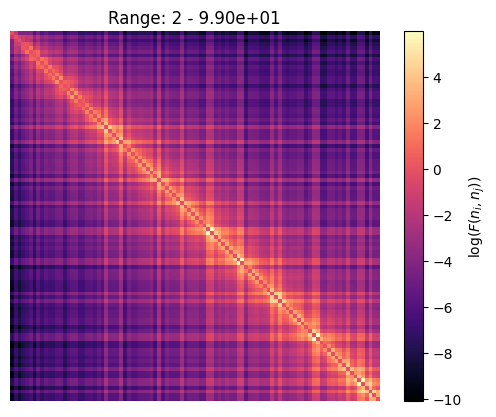

In [5]:
nums = np.arange(2, 1e2)
mat = compute_grav(nums)
plt.imshow(mat, cmap = "magma")
plt.axis("off")
plt.title(f"Range: {int(nums[0])} - {int(nums[-1]):.2e}")
cbar = plt.colorbar()
cbar.set_label("$\log(F(n_{i}, n_{j}))$")

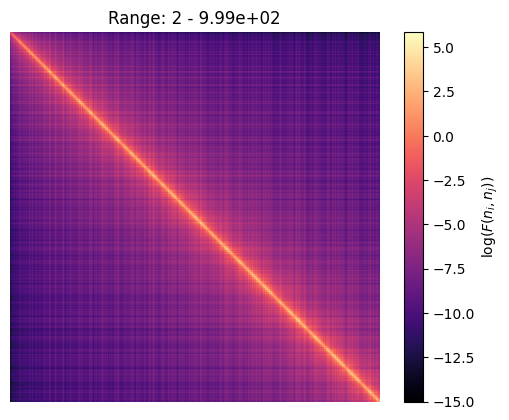

In [15]:
nums = np.arange(2, 1e3)
mat = compute_grav(nums)
plt.imshow(mat, cmap = "magma")
plt.axis("off")
plt.title(f"Range: {int(nums[0])} - {int(nums[-1]):.2e}")
cbar = plt.colorbar()
cbar.set_label("$\log(F(n_{i}, n_{j}))$")

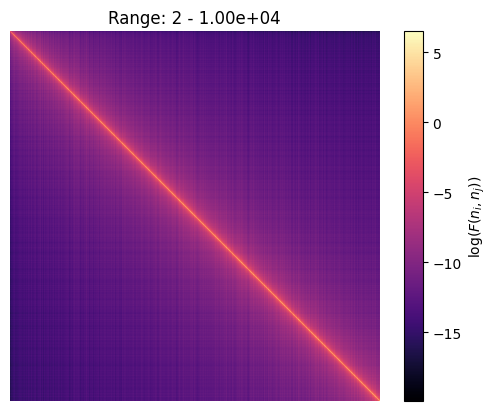

In [17]:
nums = np.arange(2, 1e4)
mat = compute_grav(nums)
plt.imshow(mat, cmap = "magma")
plt.axis("off")
plt.title(f"Range: {int(nums[0])} - {int(nums[-1]):.2e}")
cbar = plt.colorbar()
cbar.set_label("$\log(F(n_{i}, n_{j}))$")

In [2]:
def collatz_trajectory(n):
    t = []
    while n != 1:
        if n % 2 == 0:
            t.append(0)
            n /= 2
        else:
            t.append(1)
            n = 3*n + 1
    return t

In [47]:
nums = np.arange(2, 1e3)
trajs = [collatz_trajectory(num) for num in nums]
MAX = max([len(traj) for traj in trajs])
S = np.array([np.pad(traj, (0, MAX - len(traj)), constant_values=traj[-1]) for traj in trajs]).T

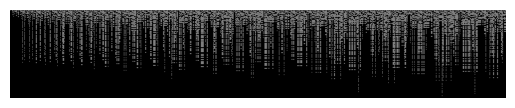

In [48]:
plt.imshow(S, cmap = "gray")
plt.axis("off")
plt.savefig("collatz_automata.png", dpi=600)

In [42]:
# Now with the extended indicational calculus' waveform
nums = np.arange(2, 1e3)
trajs = [collatz_indicational(num)[0] for num in nums]
MAX = max([len(traj) for traj in trajs])
S = np.array([np.pad(traj, (0, MAX - len(traj)), constant_values=traj[-1]) for traj in trajs]).T

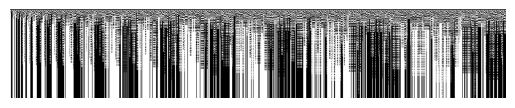

In [46]:
plt.imshow(S, cmap = "gray")
plt.axis("off")
plt.savefig("collatz_indicational_automata.png", dpi=600)